In [1]:
import sys
import numpy as np
import math
from time import time

sys.path.append('..')
import ntm
import tasks

np.random.seed(22334)


Using gpu device 0: GeForce GTX 650 Ti


# training

In [2]:
model = ntm.NTM (
    input_size    = 8, 
    output_size   = 8, 
    mem_size      = 128, 
    mem_width     = 20, 
    hidden_sizes  = [100],
    max_epochs    = 100000, 
    momentum      = 0.9, 
    learning_rate = 1e-5 ,
    grad_clip     = [-10,10], 
    l2_norm       = 1e-4 
)



/home/chanhou/.pyenv/versions/anaconda-2.2.0/lib/python2.7/site-packages/theano/tensor/var.py:359: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if arg != numpy.newaxis:
/home/chanhou/.pyenv/versions/anaconda-2.2.0/lib/python2.7/site-packages/theano/tensor/subtensor.py:114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  stop in [None, length, maxsize] or
/home/chanhou/.pyenv/versions/anaconda-2.2.0/lib/python2.7/site-packages/theano/tensor/subtensor.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  start in [None, 0] or
/home/chanhou/.pyenv/versions/anaconda-2.2.0/lib/python2.7/site-packages/theano/tensor/opt.py:2165: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (replace_x == replace_y and
/home/chanhou/.pyenv/versions/anaconda-2.2.0/lib/python2.7/site-packages/t

In [3]:

t0 = time()

train_cost = None

alpha = 0.95

for counter in xrange(model.max_epochs):

    length = np.random.randint(1,21)
    i,o = tasks.copy(8,length)
    if train_cost == None: train_cost = model.train(i,o)
    else: train_cost = alpha * train_cost + (1 - alpha) * model.train(i,o)
    
    train_cost = train_cost / ((o.shape[0]*o.shape[1]* 1.0))
    
#     if counter % 1000 == 0:
#         print "round:", counter,"length",length, "training_cost:", train_cost
    
    if math.isnan(train_cost):
        print "meet nan"
        break


    # calculate bits per character error with length np.random.randint(1,101) sequence
    length2 = np.random.randint(21, 101)
    i,o = tasks.copy(8,length2)
    valid_cost = model.predict_cost(i,o) / (o.shape[0]*o.shape[1]* 1.0)
    
    if counter % 1000 == 0:
        print "round:", counter,"length",length2, "validation_cost:", valid_cost, "time:", time()-t0
        t0 = time()
        
    model.train_his.append({"round":counter, "cost": valid_cost})

    if valid_cost < model.best_valid_cost:
        model.save('./model_check.pkl')
        model.best_valid_cost = valid_cost
        print "save validation, round:", counter, "length: ",length2,"cost: ", valid_cost

    sys.stdout.flush()




round: 0 length 55 validation_cost: 0.931947822152 time: 0.303102970123
save validation, round: 0 length:  55 cost:  0.931947822152
save validation, round: 2 length:  63 cost:  0.671977151159
save validation, round: 7 length:  39 cost:  0.642920165717
save validation, round: 12 length:  28 cost:  0.625126510742
save validation, round: 15 length:  54 cost:  0.614559799118
save validation, round: 17 length:  34 cost:  0.612631057619
save validation, round: 18 length:  53 cost:  0.606340054158
save validation, round: 23 length:  49 cost:  0.603360475244
save validation, round: 24 length:  42 cost:  0.597917938134
save validation, round: 27 length:  22 cost:  0.591959055737
save validation, round: 33 length:  55 cost:  0.590486369565
save validation, round: 34 length:  58 cost:  0.579687755937
save validation, round: 39 length:  29 cost:  0.576209297944
save validation, round: 43 length:  53 cost:  0.571242605256
save validation, round: 51 length:  36 cost:  0.568331941046
save validation,

KeyboardInterrupt: 

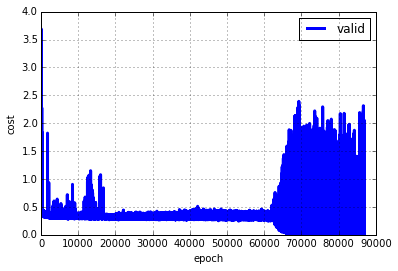

In [6]:
# train_his
%matplotlib inline
import matplotlib.pyplot as pyplot

np.array( [i["cost"] for i in model.train_his] )

# train_loss = np.array(train_his['score'])
valid_loss = np.array( [i["cost"] for i in model.train_his] )
# pyplot.plot(train_loss, linewidth=3, label="train")
pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("cost")
# pyplot.ylim(2.5e-2, 0.32e-1)
# pyplot.yscale("log")
pyplot.show()




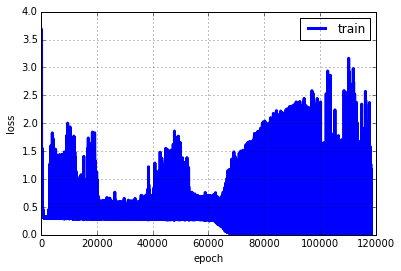

In [12]:
# train_his
import matplotlib.pyplot as pyplot

train_loss = np.array(train_his['cost'])
# valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
pyplot.plot(train_loss, linewidth=3, label="train")
# pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
# pyplot.ylim(2.5e-2, 0.32e-1)
# pyplot.yscale("log")
pyplot.show()

